# Image Classification Deep Learning

## Preprocess Dara

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input, Lambda, Activation, Dense, Flatten, BatchNormalization, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
image_path = '/content/drive/MyDrive/indianfood_convnet/Food Classification'
class_names = os.listdir(image_path)
num_class = len(class_names)

In [4]:
!pip install split-folders

In [6]:
import splitfolders

# Split with a ratio
splitfolders.ratio('/content/drive/MyDrive/indianfood_convnet/Food Classification', output="dataset", seed=1337, ratio=(.8, .2), group_prefix=None)  # 80% training, 20% validation


Copying files: 0 files [00:00, ? files/s]
Copying files: 2 files [00:00,  4.94 files/s]
Copying files: 3 files [00:00,  4.29 files/s]
Copying files: 4 files [00:00,  4.05 files/s]
Copying files: 5 files [00:01,  3.48 files/s]
Copying files: 6 files [00:04,  1.36s/ files]
Copying files: 27 files [00:04,  7.80 files/s]
Copying files: 44 files [00:05, 15.25 files/s]
Copying files: 56 files [00:05, 21.21 files/s]
Copying files: 77 files [00:05, 36.05 files/s]
Copying files: 100 files [00:05, 55.49 files/s]
Copying files: 125 files [00:05, 79.95 files/s]
Copying files: 144 files [00:05, 96.23 files/s]
Copying files: 164 files [00:05, 113.84 files/s]
Copying files: 183 files [00:05, 125.98 files/s]
Copying files: 202 files [00:05, 133.00 files/s]
Copying files: 223 files [00:06, 148.09 files/s]
Copying files: 241 files [00:06, 146.44 files/s]
Copying files: 258 files [00:06, 137.69 files/s]
Copying files: 274 files [00:06, 67.31 files/s] 
Copying files: 289 files [00:06, 78.08 files/s]
Copy

In [7]:
train_path = '/content/dataset/train'
validation_path = '/content/dataset/val'

In [8]:
class_names

['chai', 'kulfi', 'momos', 'dhokla', 'pav_bhaji', 'butter_naan']

In [9]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                   rotation_range =40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)

val_datagen = ImageDataGenerator(
    rescale=1./255  # Rescale pixel values from [0, 255] to [0, 1]
)

In [10]:
train_generator = train_datagen.flow_from_directory(train_path, batch_size = 32, class_mode = 'categorical',
                                                    target_size = (224, 224), subset='training',
                                                    shuffle = None)

Found 1057 images belonging to 6 classes.


In [11]:
validation_generator = val_datagen.flow_from_directory(validation_path, batch_size = 32, class_mode = 'categorical',
                                                    target_size = (224, 224), subset='training',
                                                    shuffle = None)

Found 333 images belonging to 6 classes.


In [12]:
true_class = validation_generator.classes

true_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

## Arsitektur InceptionV3

In [29]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')


for layer in pre_trained_model.layers:
  layer.trainable = False

In [30]:
# Versi 1
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(num_class, activation = 'softmax')(x)
model = Model(pre_trained_model.input, x)

model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs = 5
history = model.fit(train_generator,
                    epochs  = epochs,
                    steps_per_epoch = len(train_generator),
                    validation_data = validation_generator,
                    validation_steps = len(validation_generator))

Epoch 1/5
14/34 [===========>..................] - ETA: 2:42 - loss: 58.7603 - accuracy: 0.2210

In [17]:
#Prediksi

pred = model.predict(validation_generator)
predicted_class = pred.argmax(axis=1)
predicted_class


# True Class
true_class = validation_generator.classes
true_class

11/11 [==============================] - 40s 3s/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [18]:
# Evaluasi
from sklearn.metrics import classification_report
print(classification_report(true_class, predicted_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.35      1.00      0.52        77
           2       0.30      0.55      0.39        58
           3       0.00      0.00      0.00        48
           4       1.00      0.11      0.20        64
           5       0.00      0.00      0.00        71

    accuracy                           0.35       333
   macro avg       0.28      0.28      0.18       333
weighted avg       0.33      0.35      0.23       333



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
history.history

{'loss': [57.576725006103516],
 'accuracy': [0.3103122115135193],
 'val_loss': [1.3907421827316284],
 'val_accuracy': [0.3543543517589569]}

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

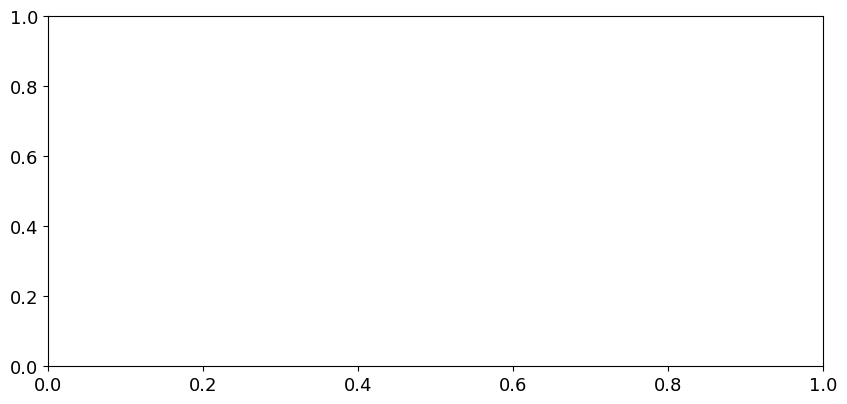

In [26]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, color='red', label='Training Accuracy')
plt.plot(epochs_range, val_acc, color='blue', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axis([0, 50, 0, 1])
plt.legend(loc='lower right')

plt.title('Accuracy Inception V3')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, color='red', label='Training Loss')
plt.plot(epochs_range, val_loss, color='blue', label='Validation Loss')
plt.legend(loc='upper right')
plt.axis([0, 50, 0, 5])
plt.ylabel('Loss')
plt.xlabe('Epoch')
plt.title('Loss InceptionV3')
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()

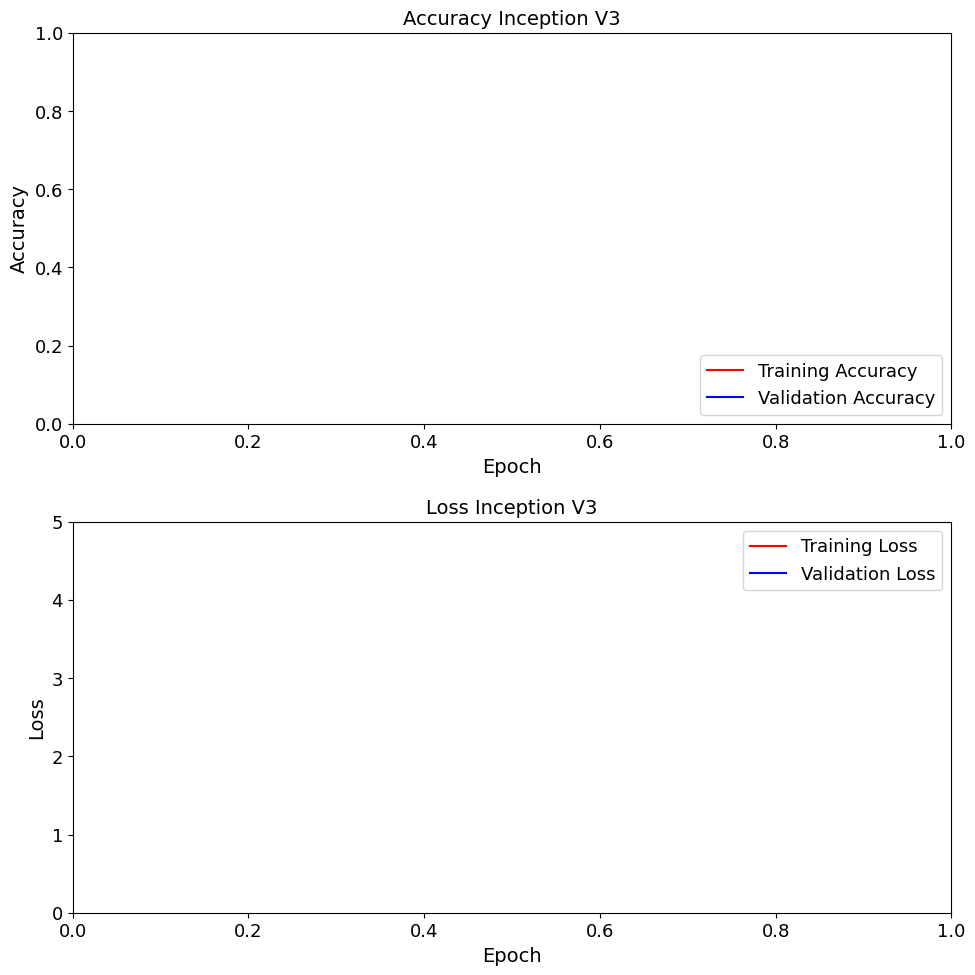

In [25]:
import matplotlib.pyplot as plt

# Set font sizes for the plots
SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

# Ensure history is available
if 'history' in locals():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Define epochs_range based on the length of acc (or any of the history lists)
    epochs = len(acc)
    epochs_range = range(epochs)

    plt.figure(figsize=(10, 10))

    # Plot Training and Validation Accuracy
    plt.subplot(2, 1, 1)
    plt.plot(epochs_range, acc, color='red', label='Training Accuracy')
    plt.plot(epochs_range, val_acc, color='blue', label='Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.axis([0, epochs, 0, 1])
    plt.legend(loc='lower right')
    plt.title('Accuracy Inception V3')

    # Plot Training and Validation Loss
    plt.subplot(2, 1, 2)
    plt.plot(epochs_range, loss, color='red', label='Training Loss')
    plt.plot(epochs_range, val_loss, color='blue', label='Validation Loss')
    plt.legend(loc='upper right')
    plt.axis([0, epochs, 0, 5])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')  # Fixed typo here
    plt.title('Loss Inception V3')

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()
else:
    print("History object not found. Ensure the model has been trained and the history object is available.")


### Arsitektur Resnet50

In [22]:
from tensorflow.keras.applications.resnet50 import ResNet50

ttl = 'Arsitektur ResNet50'

pre_traned_model = ResNet50(input_shape = (224,224,3), include_top = False, weights = 'imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [24]:
resnet_model = Sequential()
resnet_model.add(pre_trained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(num_class, activation = 'softmax'))

resnet_model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',
                     metrics=['accuracy'])

epochs = 5
history = resnet_model.fit(train_generator,
                           epochs = epochs
                    steps_per_epoch = len(train_generator),
                    validation_data = validation_generator,
                    validation_steps = len(validation_generator))

Copying files: 3 files [14:56, 298.82s/ files]


34/34 [==============================] - 271s 8s/step - loss: 57.5767 - accuracy: 0.3103 - val_loss: 1.3907 - val_accuracy: 0.3544


In [ ]:
prediction = resnet_model.predict(validation_generator)
predicted_class = prediction.argmax(axis=-1)
predicted_class

In [ ]:
print(classification_report(true_class, predicted_class))

In [ ]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick'. labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, color='red', label='Training Accuracy')
plt.plot(epochs_range, val_acc, color='blue', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axis([0, 50, 0, 1])
plt.legend(loc='lower right')

plt.title('Accuracy ResNet50')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, color='red', label='Training Loss')
plt.plot(epochs_range, val_loss, color='blue', label='Validation Loss')
plt.legend(loc='upper right')
plt.axis([0, 50, 0, 5])
plt.ylabel('Loss')
plt.xlabe('Epoch')
plt.title('Loss ResNet50')
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()

### Arsitektur Xception

In [ ]:
from tensorflow.keras.applications.xception import Xception

pre_trained_model = Xception(input_shape = (224,224,3), include_top = False, weights = 'imagenet')

for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
model = Sequential()
model.add(pre_trained_model)
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(num_class, activation = 'softmax'))

model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',
              metrics= ['accuracy'])

epochs = 5
history = resnet_model.fit(train_generator,
                           epochs = epochs
                    steps_per_epoch = len(train_generator),
                    validation_data = validation_generator,
                    validation_steps = len(validation_generator))

In [ ]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick'. labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, color='red', label='Training Accuracy')
plt.plot(epochs_range, val_acc, color='blue', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axis([0, 50, 0, 1])
plt.legend(loc='lower right')

plt.title('Accuracy ResNet50')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, color='red', label='Training Loss')
plt.plot(epochs_range, val_loss, color='blue', label='Validation Loss')
plt.legend(loc='upper right')
plt.axis([0, 50, 0, 5])
plt.ylabel('Loss')
plt.xlabe('Epoch')
plt.title('Loss Xception')
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()

In [ ]:
predict = model.predict_generator(validation_generator, len(validation_generator))
class_predict = predict.argmax(axis=1)

In [ ]:
print(classification_report(true_class, class_predict)

### Arsitektur MobileNet

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, Model

pre_trained_model = MobileNet(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze all the layers in the base model
for layer in pre_trained_model.layers:
    layer.trainable = False


model = Sequential()
model.add(pre_trained_model)
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(num_class, activation = 'softmax'))

model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',
              metrics==['accuracy'])

epochs = 5
history = resnet_model.fit(train_generator,
                           epochs = epochs
                    steps_per_epoch = len(train_generator),
                    validation_data = validation_generator,
                    validation_steps = len(validation_generator))

In [ ]:
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 13
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick'. labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=MEDIUM_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, color='red', label='Training Accuracy')
plt.plot(epochs_range, val_acc, color='blue', label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.axis([0, 50, 0, 1])
plt.legend(loc='lower right')

plt.title('Accuracy ResNet50')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, color='red', label='Training Loss')
plt.plot(epochs_range, val_loss, color='blue', label='Validation Loss')
plt.legend(loc='upper right')
plt.axis([0, 50, 0, 5])
plt.ylabel('Loss')
plt.xlabe('Epoch')
plt.title('Loss Xception')
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()

In [ ]:
predict = model.predict_generator(validation_generator, len(validation_generator))
class_predict = predict.argmax(axis=1)

In [ ]:
print(classification_report(true_class, class_predict)

### Arsitektur EfficientNet

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, Model

# Load the pre-trained EfficientNetB0 model without the top layers
pre_trained_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze all the layers in the base model
for layer in pre_trained_model.layers:
    layer.trainable = False



model = Sequential()
model.add(pre_trained_model)
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(num_class, activation = 'softmax'))

model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',
              metrics==['accuracy'])

epochs = 5
history = resnet_model.fit(train_generator,
                           epochs = epochs
                    steps_per_epoch = len(train_generator),
                    validation_data = validation_generator,
                    validation_steps = len(validation_generator))